**IMPORTING THE NECESSARY LIBRARY**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING MY CSV FILE**

In [7]:
from google.colab import files
import pandas as pd

In [8]:
uploaded = files.upload()

Saving customer_segmentation_data.csv to customer_segmentation_data.csv


In [9]:
df = pd.read_csv("customer_segmentation_data(in).csv")
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,annual_spend,customer_lifetime_value,Segment,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,38,Female,"$99,342",90,3,24,Groceries,$113.53,"$2,724.72","$8,174.16",High Value,NaN,NaN,NaN,NaN,NaN
1,2,21,Female,"$78,852",60,2,42,Sports,$41.93,"$1,761.06","$3,522.12",Price Sensitive,NaN,NaN,NaN,NaN,NaN
2,3,60,Female,"$126,573",30,2,28,Clothing,$424.36,"$11,882.08","$23,764.16",Growth Potential,NaN,NaN,NaN,NaN,NaN
3,4,40,Other,"$47,099",74,9,5,Home & Garden,$991.93,"$4,959.65","$44,636.85",Price Sensitive,NaN,NaN,NaN,NaN,NaN
4,5,65,Female,"$140,621",21,3,25,Electronics,$347.08,"$8,677.00","$26,031.00",Growth Potential,NaN,NaN,NaN,NaN,NaN


**CLEANING THE DATA**

In [10]:
df = df.drop(["Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16"], axis=1)

In [11]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,annual_spend,customer_lifetime_value,Segment
0,1,38,Female,"$99,342",90,3,24,Groceries,$113.53,"$2,724.72","$8,174.16",High Value
1,2,21,Female,"$78,852",60,2,42,Sports,$41.93,"$1,761.06","$3,522.12",Price Sensitive
2,3,60,Female,"$126,573",30,2,28,Clothing,$424.36,"$11,882.08","$23,764.16",Growth Potential
3,4,40,Other,"$47,099",74,9,5,Home & Garden,$991.93,"$4,959.65","$44,636.85",Price Sensitive
4,5,65,Female,"$140,621",21,3,25,Electronics,$347.08,"$8,677.00","$26,031.00",Growth Potential


**Scatter Plot (Income vs Spending Score)**

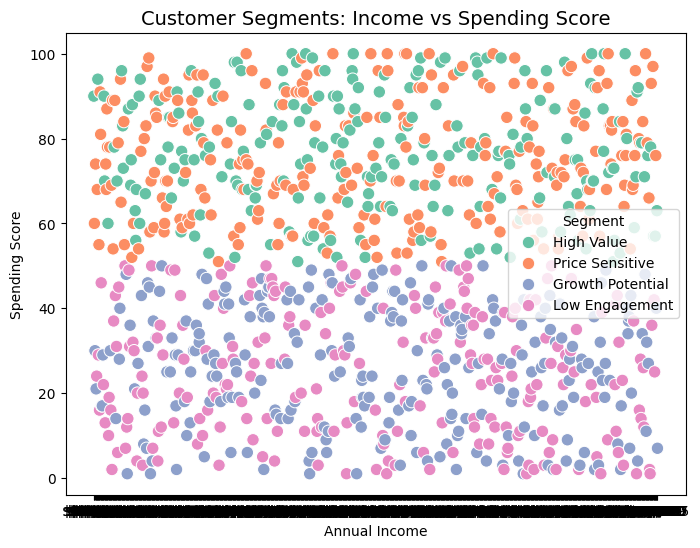

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="income", y="spending_score", hue="Segment", palette="Set2", s=80)
plt.title("Customer Segments: Income vs Spending Score", fontsize=14)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

**Bar Chart (Average Purchase Frequency by Segment)**

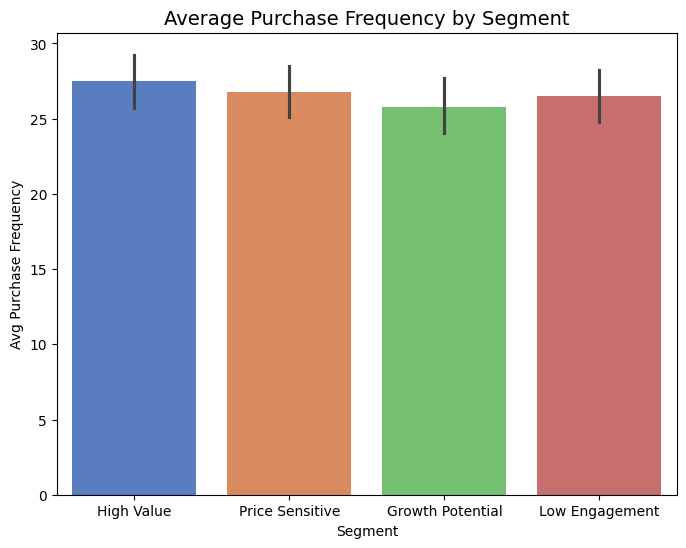

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=df,
    x="Segment",
    y="purchase_frequency",
    hue="Segment",       # Explicitly add hue
    palette="muted",
    legend=False,        # Hide legend since hue == x
    estimator="mean"
)
plt.title("Average Purchase Frequency by Segment", fontsize=14)
plt.ylabel("Avg Purchase Frequency")
plt.show()


**Revenue by Preferred Category**

In [ ]:
df["Annual_Spend"] = df["purchase_frequency"] * df["last_purchase_amount"]

plt.figure(figsize=(8,6))
sns.barplot(
    data=df,
    x="preferred_category",
    y="Annual_Spend",
    hue="Segment",             # <-- Capital S
    estimator="sum",
    palette="coolwarm"
)
plt.title("Total Revenue by Preferred Category", fontsize=14)
plt.ylabel("Total Annual Spend")
plt.xticks(rotation=45)
plt.show()